<a href="https://colab.research.google.com/github/Iingxaki/MLA_RH/blob/main/ML5_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Radjamin Hukom**  

## Standard Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [6]:
# prompt: Include imports for Voting, Bagging, Random Forest, AdaBoost classifiers,  classification_report and ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
# <a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
#
# # Machine Learning Assignment #
# **Radjamin Hukom**
# ## Standard Imports
%matplotlib inline
drive.mount('/content/gdrive')
# ## Imports for specific models
# In this section, you will import the models from SKLearn that you will use this in this notebook.
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for Splitting Data and Building Pipeline


In [7]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [9]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [10]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [11]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CS430/ML5_RH/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CS430/ML5_RH/landsat_test.csv')

### Statistical and Visual Exploration

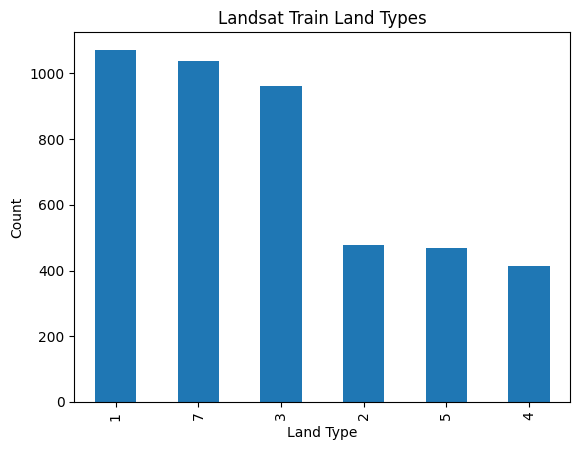

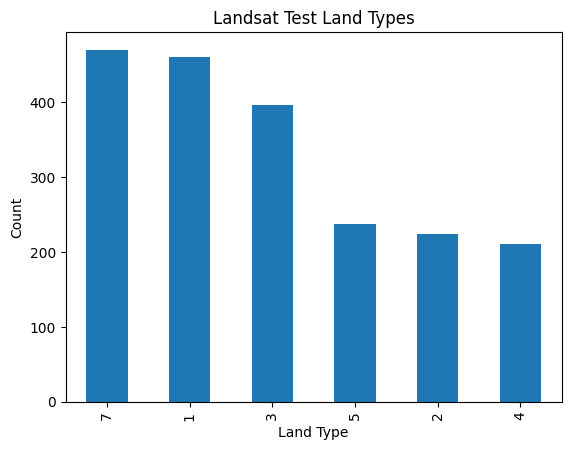

In [12]:
# prompt: Create bar plots to display the number of land types. One barplot for landsat_train and one barplot for landsat_test.

# Bar plot for landsat_train land types
landsat_train['land_type'].value_counts().plot(kind='bar', title='Landsat Train Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

# Bar plot for landsat_test land types
landsat_test['land_type'].value_counts().plot(kind='bar', title='Landsat Test Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [13]:
# prompt: Create a data frame called X_train with all columns from landsat_train except for land_type.
# Create a data frame called X_test with all columns from landsat_test except for land_type.
# Create a data frame called y_train with the land_type column from landsat_train.
# Create a data frame called y_test with the land_type column from landsat_test.

X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

### Building the Pipeline

In [14]:
# prompt: Create a column transformer that will MinMax scale the numerical variables
# Create a pipeline that will transform the data and then run the RandomForestClassifier algorithm.

numerical_features = X_train.select_dtypes(include=['number']).columns

# Create a column transformer to scale numerical features
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features)
    ], remainder='passthrough')

# Create a pipeline with the column transformer and RandomForestClassifier
pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', RandomForestClassifier())
])

### Executing the Model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


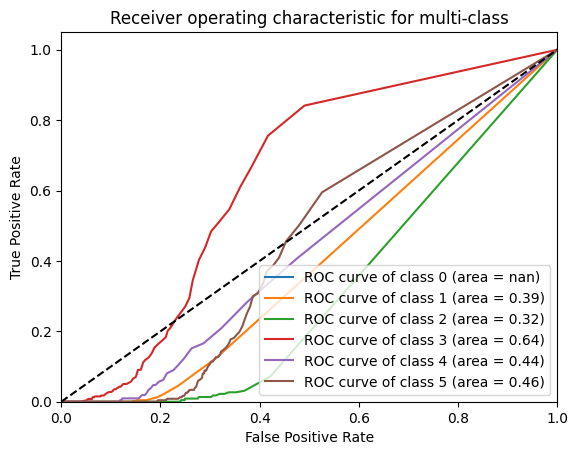

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Get predicted probabilities for the test set using the pipeline
y_pred_proba = pipeline.predict_proba(X_test)

# Get the number of classes
n_classes = y_pred_proba.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

### Evaluating Model

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       461
           2       0.97      0.98      0.98       224
           3       0.88      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.94      0.88      0.91       237
           7       0.88      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



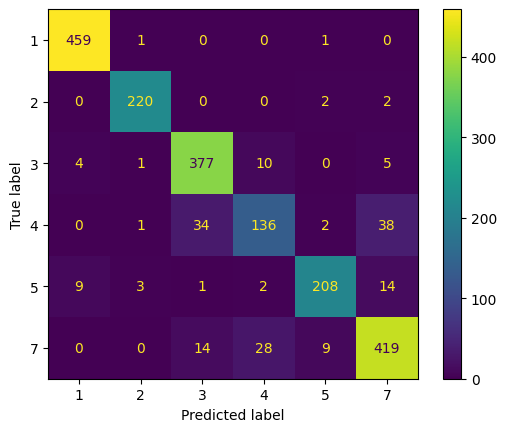

In [19]:
# prompt: Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
# Use the classification_function to display the precision, recall, and F1 score for each class.
# Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

def classification_function(y_test, y_pred):
  print(classification_report(y_test, y_pred))

classification_function(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

### Conclusion
According to the performance indicators given, the model seems to be a good fit for forecasting the type of land. The model predicts the land type properly in a substantial majority of cases, as seen by its 91% overall accuracy. The precision and recall scores are high, usually above 0.85, for the majority of land types, including types 1, 2, 3, 5, and 7, indicating that the model is successful in accurately recognizing genuine positives and reducing false positives. With values of 0.77 and 0.63, respectively, the precision and recall are lower for land type 4. This suggests that this category is more difficult for the model to handle, which may be because there are fewer distinctive traits or there is more overlap with other terrain types.

These conclusions are corroborated by the F1-scores, which display high values for the majority of land types, especially types 1, 2, and 3. However, land type 4's F1-score of 0.69 indicates that this specific category needs to be further refined for differentiation. The model works effectively across many terrain types and is not unduly biased towards any one category, as evidenced by the precision, recall, and F1-score macro and weighted averages of 0.89–0.91.

All things considered, the model's high accuracy and robust performance measures for the majority of land types indicate that it is generally a good fit for land type prediction. The poorer performance for land type 4 points to a possible improvement region, indicating that the model's performance could be improved by further fine-tuning it—possibly by adding more features or utilizing training data that is more evenly distributed. Although there is potential for ongoing development in certain areas, the model's great forecasting capacity makes it a dependable tool for classifying different types of land.


## Problem 2



### Building, Executing, and Evaluating the Pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       461
           2       0.61      0.99      0.75       224
           3       0.87      0.93      0.90       397
           4       0.59      0.70      0.64       211
           5       0.68      0.29      0.41       237
           7       0.92      0.73      0.81       470

    accuracy                           0.80      2000
   macro avg       0.77      0.77      0.75      2000
weighted avg       0.82      0.80      0.79      2000



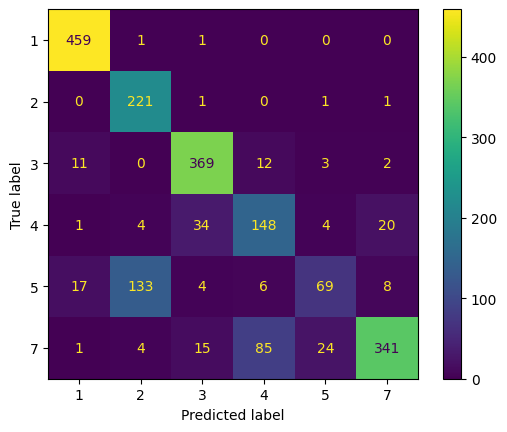

Bagging Classifier:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.98      0.98       224
           3       0.88      0.95      0.91       397
           4       0.77      0.60      0.68       211
           5       0.92      0.87      0.90       237
           7       0.86      0.90      0.88       470

    accuracy                           0.90      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.90      0.90      0.90      2000



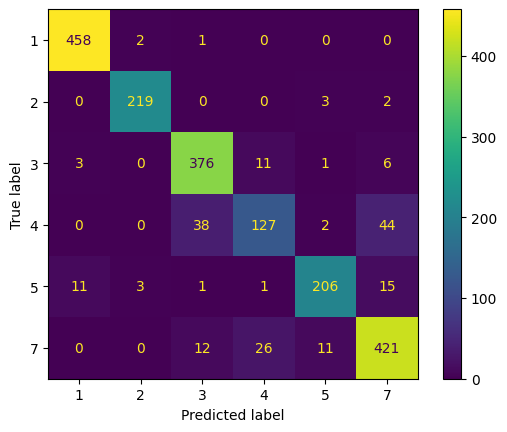

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting Classifier:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.97      0.98       224
           3       0.88      0.94      0.91       397
           4       0.79      0.64      0.70       211
           5       0.91      0.90      0.90       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



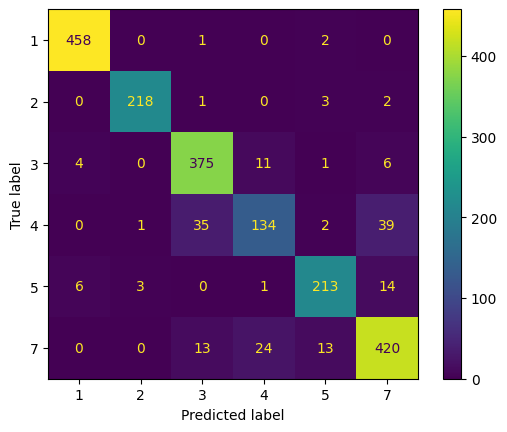

In [20]:
# prompt: implement a Voting Classifier, Bagging Classifier, and Boosting Classifier using random forest classifier and adaboostclassifier

# Create a Voting Classifier
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()

voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('ada', ada_clf)], voting='hard')

# Create a Bagging Classifier
bagging_clf = BaggingClassifier(estimator=rf_clf, n_estimators=10, random_state=42) # Change 'base_estimator' to 'estimator'

# Create a Boosting Classifier
boosting_clf = AdaBoostClassifier(estimator=rf_clf, n_estimators=50, random_state=42) # Change 'base_estimator' to 'estimator'


# Create a pipeline with the Voting Classifier
pipeline_voting = Pipeline([
    ('transformer', ct),
    ('classifier', voting_clf)
])

# Create a pipeline with the Bagging Classifier
pipeline_bagging = Pipeline([
    ('transformer', ct),
    ('classifier', bagging_clf)
])


# Create a pipeline with the Boosting Classifier
pipeline_boosting = Pipeline([
    ('transformer', ct),
    ('classifier', boosting_clf)
])


# Fit and evaluate the Voting Classifier
pipeline_voting.fit(X_train, y_train)
y_pred_voting = pipeline_voting.predict(X_test)
print("Voting Classifier:")
classification_function(y_test, y_pred_voting)
ConfusionMatrixDisplay.from_estimator(pipeline_voting, X_test, y_test)
plt.show()

# Fit and evaluate the Bagging Classifier
pipeline_bagging.fit(X_train, y_train)
y_pred_bagging = pipeline_bagging.predict(X_test)
print("Bagging Classifier:")
classification_function(y_test, y_pred_bagging)
ConfusionMatrixDisplay.from_estimator(pipeline_bagging, X_test, y_test)
plt.show()

# Fit and evaluate the Boosting Classifier
pipeline_boosting.fit(X_train, y_train)
y_pred_boosting = pipeline_boosting.predict(X_test)
print("Boosting Classifier:")
classification_function(y_test, y_pred_boosting)
ConfusionMatrixDisplay.from_estimator(pipeline_boosting, X_test, y_test)
plt.show()

### Conclusion
The Bagging Classifier is the best model for predicting land type in this dataset since it exhibits the highest overall accuracy and consistency, as seen by the performance metrics that have been provided. The Bagging Classifier has a 91% accuracy rate and performs exceptionally well in terms of precision and recall for the majority of classes, especially for classes 1 and 2, which both have an F1-score of 0.98. Class 4, where the F1-score falls to 0.69, does, however, exhibit some heterogeneity.

The Voting Classifier, on the other hand, performs well in classes 1 and 2, with an accuracy of 80%, but it has a particularly poor recall of 0.30 and an F1-score of 0.41 in class 5. This implies that although the Voting Classifier is generally dependable, it contains certain flaws that can reduce its overall efficacy.

Out of the three, the Boosting Classifier performs the worst overall, with an accuracy of 69%. Class 2 and class 7 performance is respectable, but it performs poorly overall, especially in class 5, where the F1-score is a pitiful 0.27. The Boosting Classifier is the least appropriate model for this problem because of this discrepancy. The Bagging Classifier is a dependable option for classifying land types because of its high accuracy and consistent performance throughout the majority of classes, which make it stand out as the most effective overall.

## Problem 3

### Reading the Data

In [21]:
ba = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CS430/ML5_RH/banknote_authentication.csv')

### Splitting Data into Train/Test

In [22]:
#prompt: Create a data frame called X of your inputs that includes all columns except date and forgery.

X = ba.drop(['forgery'], axis=1)
y = ba.forgery

In [24]:
# prompt: Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [25]:
# prompt: Create a column transformer that will MinMax scale the numerical variables

numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create a column transformer to scale the numerical features
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
    ], remainder='passthrough')

In [27]:
# prompt: Create a pipeline that will transform the data and then run the RandomForestClassifier algorithm.

# Create a pipeline with the column transformer and the Decision Tree Classifier
pipeline = Pipeline([
    ('transformer', ct),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

### Executing the Model

In [28]:
# prompt: Run the pipeline to fit the DecisionTreeClassification model.

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

### Evaluating Model

Precision: 1.00
Recall: 0.98
F1 Score: 0.99


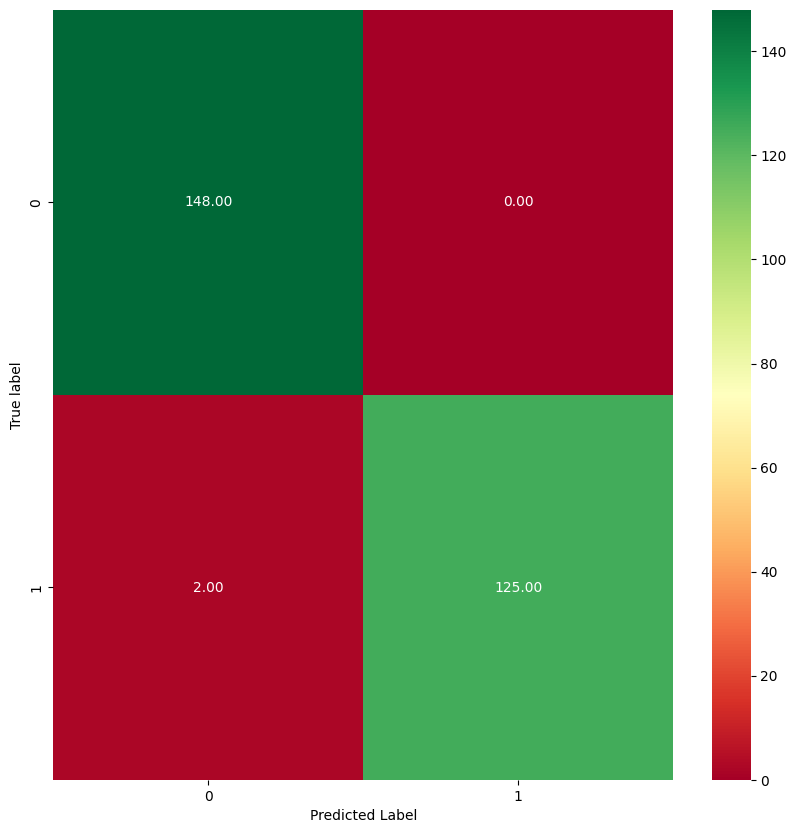

In [29]:
# prompt: Call the plot_cm function to generate the confusion matrix.
# Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.

plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

### Conclusion
These performance indicators point to a model that performs remarkably well. The model has a precision of 1.00, which means that all of the positive predictions are accurate and there are no false positive mistakes. With a recall of 0.98, the model accurately detects 98% of all real positive cases while missing extremely few. With an F1 Score of 0.99, which strikes a balance between precision and recall, the model performs almost flawlessly overall, excelling at both detecting genuine positives and avoiding false positives. This suggests a strong and trustworthy model that produces correct predictions with little errors.